In [1]:
import sys
sys.path.append('..')
from qtn.bimax import BiMax
from qtn.maxkappa import MaxKappa
from qtn.util import (boltzmann, emass, echarge, permittivity, cspeed, fperp, fp)
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ant_len = 3      # m (monopole) 
ant_rad = 0.02  # m
base_cap = 35e-12 # Farad
fbins = np.linspace(50e3, 1000e3, 100)

In [3]:
qe = 1.60217662e-19
me = 9.10938356e-31
kB = 1.38064852e-23
eps0 = 8.854187817e-12
def Ld (n, T):
    """ Calculates the Debye length in m.
    n: number density in m^-3
    T: temperature in K

    """
    return np.sqrt(eps0*kB*T/(n*qe**2))

def wp(n):
    """ Calculates the plasma frequency in rad*Hz.
    n: number density in m^-3
    T: temperature in K

    """
    return np.sqrt(n*qe**2/(me*eps0))

def fp(n):
    """ Calculates the plasma frequency in Hz.
    n: number density in m^-3
    T: temperature in K

    """
    return wp(n)/2/np.pi

def vte(T):
    """ Calculates the electron thermal velocity in m/s.
    T: temperature in K

    """
    return np.sqrt(2*kB*T/me)

def fc(n, T):
    """ Calculates the collisional frequency of plasma in Hz."""
    lnLam = 10
    fc = np.pi**(3/2)*n*qe**4*lnLam/(np.sqrt(2)*(4*np.pi*eps0)**2*me**2*vte(T)**3)
    return fc


In [4]:

tc = 1 * echarge/boltzmann # 1 eV core temperture
trat = 6.57  # ratio of temperature of core (cold) to halo (hot) electrons (used to be t) for bimax
n = 0.026 # ratio of number density of halo (hot) to core (cold) electrons

kappa = 8 # for kappa distribution

ne = 500e6 # in m^-3
nc = ne/(1+n)  # core electron density in m^-3
fpe = fp(ne) # plasma frequency for electrons in Hz
ldc = Ld(ne, tc)

In [5]:
lrel = ant_len/ldc  
wrelplot = fbins/fpe


In [6]:
pb = BiMax(ant_len, ant_rad, base_cap) # bimaxwellian
pk = MaxKappa(ant_len, ant_rad, base_cap) # bi-kappa

In [19]:
gb_s = np.array([pb.gamma_shot(wrel, lrel, n, trat, tc) for wrel in wrelplot])
gk_s = np.array([pk.gamma_shot(wrel, lrel, n, trat, kappa,tc) for wrel in wrelplot])

In [8]:
def helper(wrel):
    """
    add precision control to bimax function.
    
    """
    if wrel > 1 and wrel < 1.2:
        mp.mp.dps = 40 # tuning up the number of digits close to plasma resonance
    else:
        mp.mp.dps = 20
    enoise_b = pb.bimax(wrel, lrel, n, trat, tc)
    enoise_k = pk.maxkappa(wrel, lrel, n, trat, kappa, tc)
    return (enoise_b, enoise_k)

In [9]:
enoise = np.array([helper(wrel) for wrel in wrelplot])
enoise_b, enoise_k = enoise.T

In [10]:
gamma_b = gb_s[:, 0]
shot_b = gb_s[:, 1]
vr2_b = enoise_b + shot_b

gamma_k = gk_s[:, 0]
shot_k = gk_s[:, 1]
vr2_k = enoise_k + shot_k



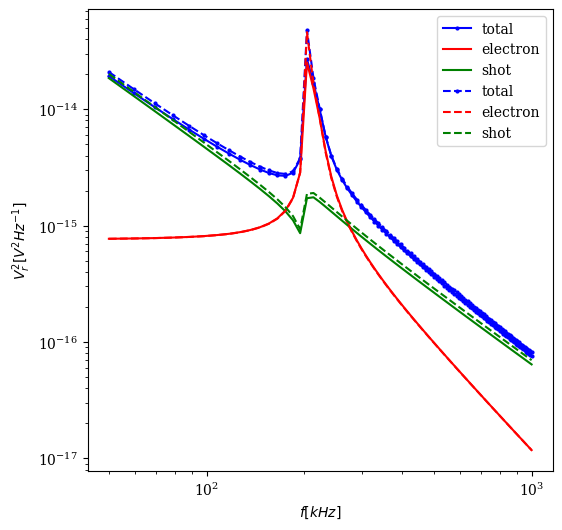

In [11]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
fig = plt.figure(figsize=[6, 6])
plt.plot(fbins/1000, vr2_b/gamma_b, 'bo-', markersize=2, label='total')
plt.plot(fbins/1000, enoise_b/gamma_b, 'r-', label='electron')
plt.plot(fbins/1000, shot_b/gamma_b, 'g-',label='shot')
plt.plot(fbins/1000, vr2_k/gamma_k, 'bo--', markersize=2, label='total')
plt.plot(fbins/1000, enoise_k/gamma_k, 'r--', label='electron')
plt.plot(fbins/1000, shot_k/gamma_k, 'g--',label='shot')
plt.xscale('log')
plt.yscale('log')
#plt.xlim([4, 256])
#plt.ylim([1e-16, 5e-13])
plt.xlabel(r'$f[kHz]$')
plt.ylabel(r'$V_r^2[V^2Hz^{-1}]$')
plt.legend(loc='best')
plt.show()

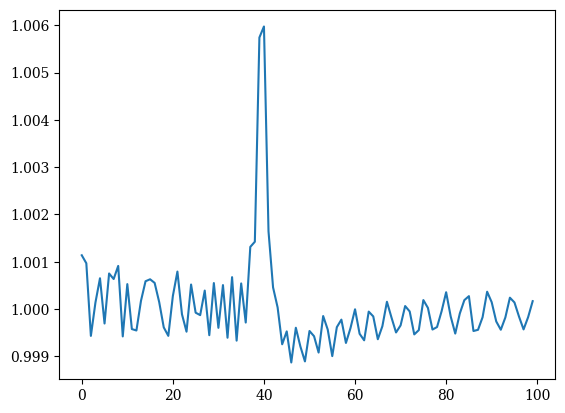

In [ ]:
def getKappaSpectrum (n, t, kappa):
    gk_s = np.array([pk.gamma_shot(wrel, lrel, n, trat, kappa,tc) for wrel in wrelplot])

In [12]:
from scipy.io import readsav
import os
root = os.environ['LUSEE_DRIVE_DIR']+'/Simulations/SkyModels/PlasmaEffects/'
f100=readsav(root+'R1_L300cm_n100t1k8v0nf300.sav')
f500=readsav(root+'R1_L300cm_n500t2k6v0nf300.sav')

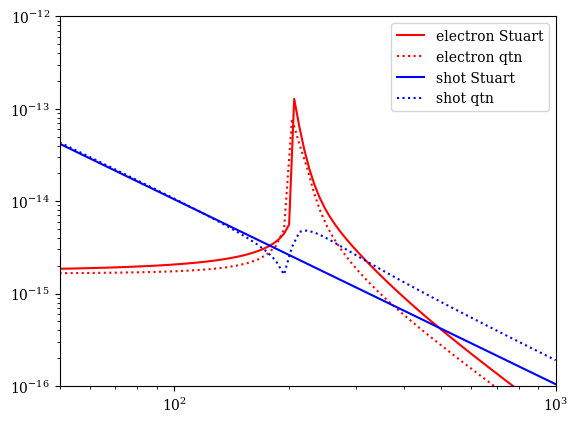

In [35]:

plt.plot(f500['f_sp']/1000,f500['v2e'],'r-', label='electron Stuart')
plt.plot(fbins/1000, enoise_k/np.sqrt(gamma_k), 'r:', label='electron qtn')
plt.plot(f500['f_sp']/1000,f500['v2i'],'b-', label='shot Stuart')
plt.plot(fbins/1000, shot_k/np.sqrt(gamma_k), 'b:', label='shot qtn')
plt.loglog()   
plt.xlim(50, 1000) 
plt.ylim(1e-16,1e-12)
plt.legend()

In [33]:
g1 = np.array([pk.gamma_shot(wrel, lrel, n, trat, kappa,tc) for wrel in wrelplot[::10]])
g2 = np.array([pk.gamma_shot(wrel, lrel, n*0.5, trat, kappa,tc) for wrel in wrelplot[::10]])

[]

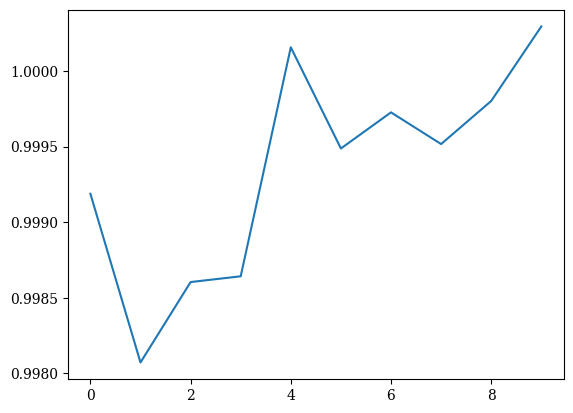

In [34]:
plt.plot(g1[:,0]/g2[:,0])
plt.plot()

In [45]:
fp(0.01e6)/1e3

0.8978662809636073